In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load the fashion_mnist dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data by scaling and reshaping
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# You can add a comparison with the previous MLP model accuracy here.


Epoch 1/10
938/938 [==============================] - 56s 59ms/step - loss: 0.5373 - accuracy: 0.8047 - val_loss: 0.3839 - val_accuracy: 0.8618
Epoch 2/10
938/938 [==============================] - 54s 57ms/step - loss: 0.3418 - accuracy: 0.8758 - val_loss: 0.3384 - val_accuracy: 0.8773
Epoch 3/10
938/938 [==============================] - 56s 60ms/step - loss: 0.2955 - accuracy: 0.8931 - val_loss: 0.3398 - val_accuracy: 0.8712
Epoch 4/10
938/938 [==============================] - 54s 57ms/step - loss: 0.2630 - accuracy: 0.9040 - val_loss: 0.2838 - val_accuracy: 0.8949
Epoch 5/10
938/938 [==============================] - 53s 56ms/step - loss: 0.2398 - accuracy: 0.9122 - val_loss: 0.2894 - val_accuracy: 0.8946
Epoch 6/10
938/938 [==============================] - 52s 55ms/step - loss: 0.2184 - accuracy: 0.9193 - val_loss: 0.2566 - val_accuracy: 0.9080
Epoch 7/10
938/938 [==============================] - 53s 57ms/step - loss: 0.2023 - accuracy: 0.9262 - val_loss: 0.2648 - val_accuracy:

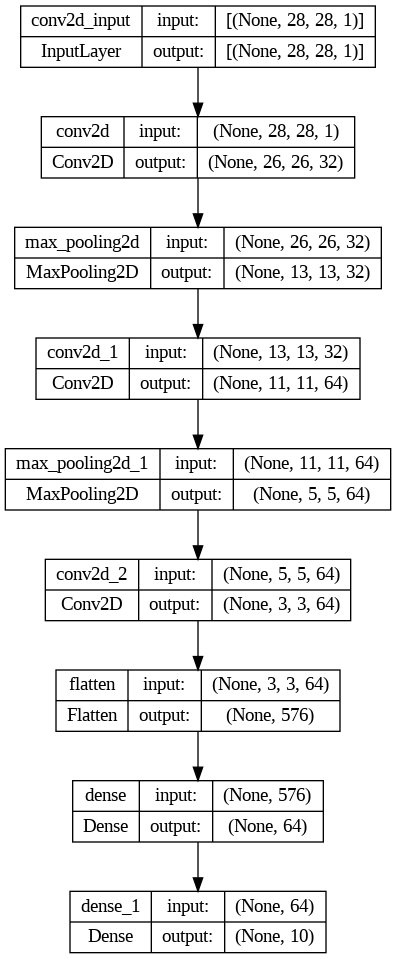

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your CNN model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


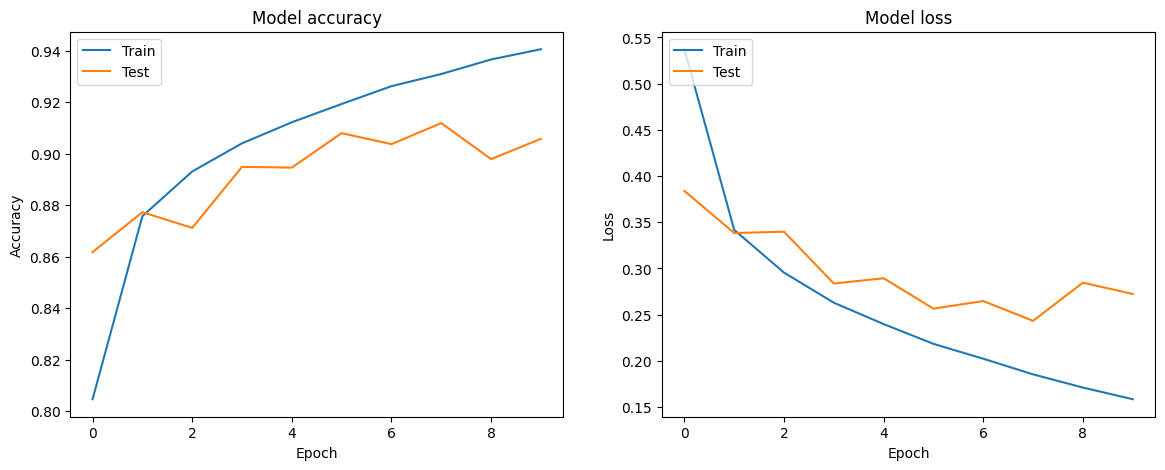

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [ ]:
from tensorflow.keras.applications import VGG16
import numpy as np

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Resize images and repeat channels to convert grayscale to RGB
train_images = np.asarray([np.repeat(image[:, :, np.newaxis], 3, axis=2) for image in train_images])
test_images = np.asarray([np.repeat(image[:, :, np.newaxis], 3, axis=2) for image in test_images])

# Resize images to 32x32 to match VGG16 input size requirement
train_images = tf.image.resize(train_images, [32, 32]).numpy()
test_images = tf.image.resize(test_images, [32, 32]).numpy()

# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Load VGG16 as the convolutional base
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional base to prevent its weights from being updated during training
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for fashion_mnist


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=20,
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
3000/3000 [==============================] - 894s 298ms/step - loss: 0.5075 - accuracy: 0.8166 - val_loss: 0.4296 - val_accuracy: 0.8469
Epoch 2/10
3000/3000 [==============================] - 895s 299ms/step - loss: 0.3962 - accuracy: 0.8534 - val_loss: 0.4096 - val_accuracy: 0.8492
Epoch 3/10
3000/3000 [==============================] - 897s 299ms/step - loss: 0.3620 - accuracy: 0.8656 - val_loss: 0.4142 - val_accuracy: 0.8495
Epoch 4/10
3000/3000 [==============================] - 894s 298ms/step - loss: 0.3381 - accuracy: 0.8733 - val_loss: 0.3702 - val_accuracy: 0.8627
Epoch 5/10
3000/3000 [==============================] - 888s 296ms/step - loss: 0.3216 - accuracy: 0.8792 - val_loss: 0.3794 - val_accuracy: 0.8636
Epoch 6/10
3000/3000 [==============================] - 886s 295ms/step - loss: 0.3072 - accuracy: 0.8851 - val_loss: 0.3687 - val_accuracy: 0.8729
Epoch 7/10
3000/3000 [==============================] - 890s 297ms/step - loss: 0.2909 - accuracy: 0.8912 - val_

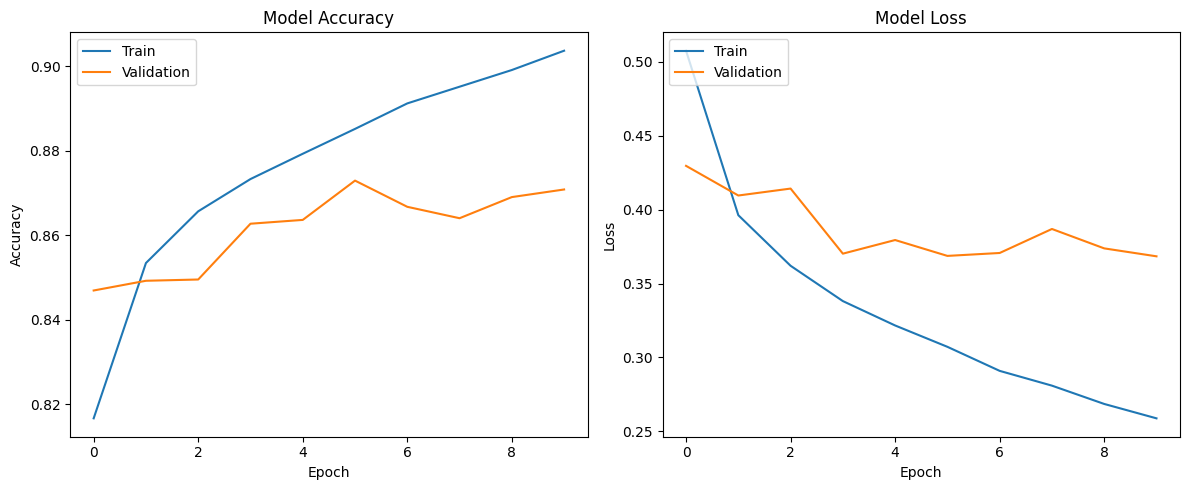

In [ ]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
